In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
car_data = pd.read_csv('cardata.csv')

In [3]:
print(car_data.head())

            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

In [4]:
print(car_data.shape)
print(car_data.describe())

(2059, 20)
              Price         Year     Kilometer       Length        Width  \
count  2.059000e+03  2059.000000  2.059000e+03  1995.000000  1995.000000   
mean   1.702992e+06  2016.425449  5.422471e+04  4280.860652  1767.991980   
std    2.419881e+06     3.363564  5.736172e+04   442.458507   135.265825   
min    4.900000e+04  1988.000000  0.000000e+00  3099.000000  1475.000000   
25%    4.849990e+05  2014.000000  2.900000e+04  3985.000000  1695.000000   
50%    8.250000e+05  2017.000000  5.000000e+04  4370.000000  1770.000000   
75%    1.925000e+06  2019.000000  7.200000e+04  4629.000000  1831.500000   
max    3.500000e+07  2022.000000  2.000000e+06  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  1995.000000       1995.000000         1946.000000  
mean   1591.735338          5.306266           52.002210  
std     136.073956          0.822170           15.110198  
min    1165.000000          2.000000           15.000000  
25%    14

In [5]:
print(car_data.isnull().sum())

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


In [6]:
print(car_data.duplicated().sum())

0


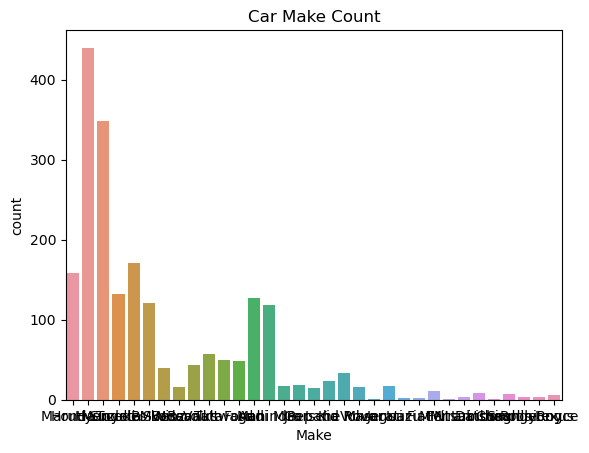

In [7]:
sns.countplot(x='Make', data=car_data)
plt.title('Car Make Count')
plt.show()

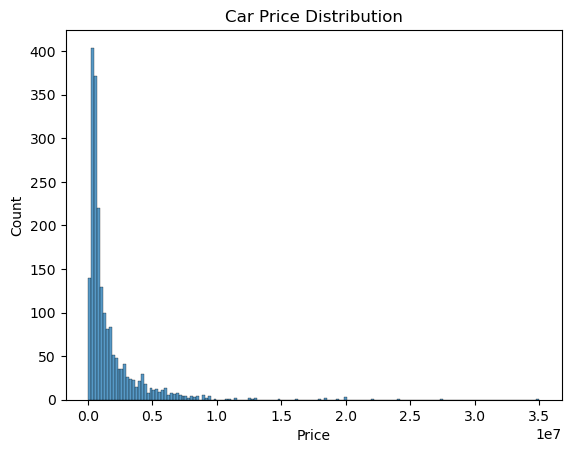

In [8]:
sns.histplot(x='Price', data=car_data)
plt.title('Car Price Distribution')
plt.show()

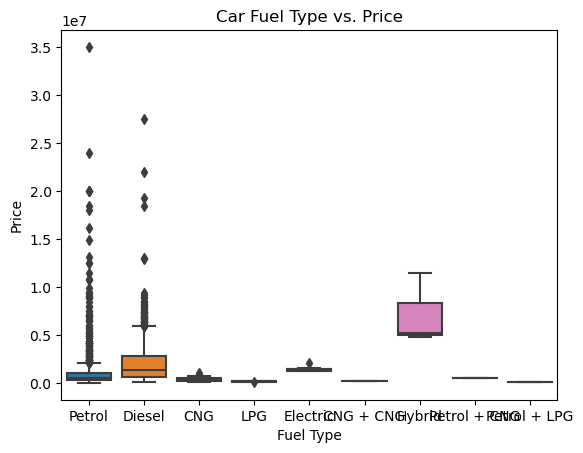

In [9]:
sns.boxplot(x='Fuel Type', y='Price', data=car_data)
plt.title('Car Fuel Type vs. Price')
plt.show()

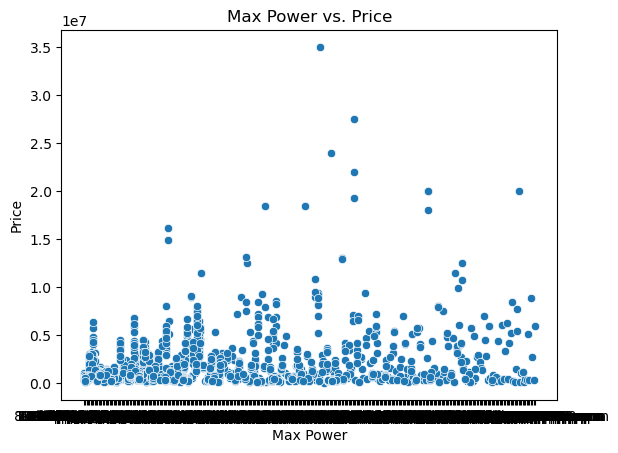

In [10]:
sns.scatterplot(x='Max Power', y='Price', data=car_data)
plt.title('Max Power vs. Price')
plt.show()

In [11]:
car_data = car_data.drop(['Model', 'Color','Owner','Seller Type','Drivetrain'], axis=1)

In [12]:
car_data.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Engine,Max Power,Max Torque,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,4735.0,1830.0,1795.0,7.0,55.0


In [13]:
label_encoder = LabelEncoder()
car_data['Make'] = label_encoder.fit_transform(car_data['Make'])
car_data['Fuel Type'] = label_encoder.fit_transform(car_data['Fuel Type'])
car_data['Engine'] = label_encoder.fit_transform(car_data['Engine'])


In [14]:
car_data['Price'] = car_data['Price'].fillna(car_data['Price'].median())
car_data['Kilometer'] = car_data['Kilometer'].fillna(car_data['Kilometer'].median())
car_data['Year'] = car_data['Year'].fillna(car_data['Year'].median())
car_data['Fuel Tank Capacity'] = car_data['Fuel Tank Capacity'].fillna(car_data['Fuel Tank Capacity'].median())

In [15]:
scaler = StandardScaler()
numerical_cols = ['Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Price']
car_data[numerical_cols] = scaler.fit_transform(car_data[numerical_cols])

In [16]:
print(car_data.head())

   Make     Price  Year  Kilometer  Fuel Type Transmission   Location  Engine  \
0     7 -0.495183  2017      87150          6       Manual       Pune       7   
1    19 -0.517916  2014      75000          2       Manual   Ludhiana       9   
2     8 -0.612986  2011      67000          6       Manual    Lucknow       6   
3    30 -0.373659  2019      37500          6       Manual  Mangalore       6   
4    30  0.102099  2018      69000          2       Manual     Mumbai      60   

            Max Power              Max Torque    Length     Width    Height  \
0   87 bhp @ 6000 rpm       109 Nm @ 4500 rpm -0.657539 -0.650675 -0.637573   
1   74 bhp @ 4000 rpm       190 Nm @ 2000 rpm -0.646235 -0.539754 -0.270034   
2   79 bhp @ 6000 rpm  112.7619 Nm @ 4000 rpm -1.573108 -1.279224 -0.306788   
3   82 bhp @ 6000 rpm       113 Nm @ 4200 rpm -0.646235 -0.170019 -0.600819   
4  148 bhp @ 3400 rpm       343 Nm @ 1400 rpm  1.026657  0.458531  1.494155   

   Seating Capacity  Fuel Tank Capacit

In [17]:
car_data.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Engine,Max Power,Max Torque,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,7,-0.495183,2017,87150,6,Manual,Pune,7,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,-0.657539,-0.650675,-0.637573,-0.372602,-1.149684
1,19,-0.517916,2014,75000,2,Manual,Ludhiana,9,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,-0.646235,-0.539754,-0.270034,-0.372602,-0.673267
2,8,-0.612986,2011,67000,6,Manual,Lucknow,6,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,-1.573108,-1.279224,-0.306788,-0.372602,-1.149684
3,30,-0.373659,2019,37500,6,Manual,Mangalore,6,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,-0.646235,-0.170019,-0.600819,-0.372602,-1.013565
4,30,0.102099,2018,69000,2,Manual,Mumbai,60,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,1.026657,0.458531,1.494155,2.060594,0.211507


In [18]:
car_data = car_data.drop('Transmission',axis=1)
car_data = car_data.drop('Location',axis=1)
car_data = car_data.drop('Max Power',axis=1)
car_data = car_data.drop('Max Torque',axis=1)


In [19]:
nan_columns = car_data.columns[car_data.isnull().any()]
print("Columns with NaN values:", nan_columns)

# Check for infinity values
inf_columns = car_data.columns[np.isinf(car_data).any()]
print("Columns with infinity values:", inf_columns)

Columns with NaN values: Index(['Length', 'Width', 'Height', 'Seating Capacity'], dtype='object')
Columns with infinity values: Index([], dtype='object')


In [20]:

car_data.dropna(inplace=True)

In [21]:

car_data = car_data[~np.isinf(car_data).any(axis=1)]
car_data = car_data.astype('float64')
print(type(car_data['Length'][0]))

<class 'numpy.float64'>


In [22]:
X = car_data.drop('Price',axis=1)
y = car_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1596, 10)
(399, 10)
(1596,)
(399,)


In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [25]:
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f'{model_name}:')
    print(f'Mean RMSE: {rmse_scores.mean()}')

Linear Regression:
Mean RMSE: 0.7315110235813027
Decision Tree:
Mean RMSE: 0.5972909967644716
Random Forest:
Mean RMSE: 0.4613471013863089


In [26]:
car_data.head()

,Make,Price,Year,Kilometer,Fuel Type,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,7.0,-0.495183,2017.0,87150.0,6.0,7.0,-0.657539,-0.650675,-0.637573,-0.372602,-1.149684
1,19.0,-0.517916,2014.0,75000.0,2.0,9.0,-0.646235,-0.539754,-0.270034,-0.372602,-0.673267
2,8.0,-0.612986,2011.0,67000.0,6.0,6.0,-1.573108,-1.279224,-0.306788,-0.372602,-1.149684
3,30.0,-0.373659,2019.0,37500.0,6.0,6.0,-0.646235,-0.170019,-0.600819,-0.372602,-1.013565
4,30.0,0.102099,2018.0,69000.0,2.0,60.0,1.026657,0.458531,1.494155,2.060594,0.211507


In [27]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
y_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 0.31356810031778964


In [30]:
def predict_car_price(input_data):
   
    predicted_price = model.predict(input_data)
    
    return predicted_price

In [31]:
car_data.head()

,Make,Price,Year,Kilometer,Fuel Type,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,7.0,-0.495183,2017.0,87150.0,6.0,7.0,-0.657539,-0.650675,-0.637573,-0.372602,-1.149684
1,19.0,-0.517916,2014.0,75000.0,2.0,9.0,-0.646235,-0.539754,-0.270034,-0.372602,-0.673267
2,8.0,-0.612986,2011.0,67000.0,6.0,6.0,-1.573108,-1.279224,-0.306788,-0.372602,-1.149684
3,30.0,-0.373659,2019.0,37500.0,6.0,6.0,-0.646235,-0.170019,-0.600819,-0.372602,-1.013565
4,30.0,0.102099,2018.0,69000.0,2.0,60.0,1.026657,0.458531,1.494155,2.060594,0.211507


In [32]:


input_data = pd.DataFrame(X)


predicted_price = predict_car_price(input_data)
print(predicted_price)

[-0.4944923  -0.51561726 -0.60215598 ... -0.56576518  1.03795133
 -0.42344674]
